# SYSC4906 Assignment 3

**Group Name: Kukai and Harshan** 

**Student names: 
  Kukai Hamada Beaudry, Harshan Anton**

# Discussion of Solution

1. Which machine learning approach did you use?
  We used the VGG16 convolutional neural network model. We used this approach because it is a neural network that was designed to work with large-scale images for recognition. It was trained on the ImageNet dataset which has over 15 million labeled high-resolution images belonging to roughly 22,000 categories. This is ideal because our purpose is to identify 16 different buildings.

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_

  The data was split using scikit-learn’s train_test_split method. We decided to split the data into a training set and a test set with a 20% split on testing images. Since our dataset is quite small (about 3000 pictures) it would make more sense to use cross-validation for training and testing split. However, the issue with cross-validation is that it takes more time than the holdout method. Since we were on a time crunch and testing various different algorithms to find the correct one the holdout method seemed more appropriate.

3. How did you train your classifier?
If you used transfer learning, describe how you did so.

  The classifier was trained by first freezing the base layers of the model, so training does not affect them. Then we compiled the model using categorical_crossentropy as the loss function, accuracy as the performance metric, and rmsprop as the optimizer. Categorical_crossentropy was used as the loss function because it is meant for single label categorization. And in our situation each image can only belong to one class.
 
Also, we used image data generators to augment our dataset to provide more data to work with and to introduce images at various orientations and modifications in the hopes of achieving a more accurate model. Finally, the new CNN is trained using fit_generator and saved as a file.

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?

   **Here are our final predictions (on our validation set):**
  1.	Building with worst recall: ML at 0.5952
  2.	Building with best precision: LB at 1.0
  3. Overall accuracy:	0.79351

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 

The model we trained did the best on 2 buildings, LB and RO. Visually inspecting the LB photos it becomes apparent that it has a very distinct orange colour unlike the other buildings in the data set. RO on the other hand is in a unique position where the building looks identical on all sides and the flat area surrounding the area forces a similar picture for the data set. This unique colour variation of LB and the lack of variety in RO must of been picked up by the training model for the great results in precession. 

The worst recall and relatively poor precision came from the ML building. Comparing the building with LB and RO, ML has no unique colour, looks completely different on various sides, and is a very large complex allowing for a larger variety in the photo orientation. There is no easy correlation within the ML building photos that can be easily picked up on and much more data would be necessary to train the model to recognise the building on all sides and angles. 

Our method was a result of researching online forms discussing image recognition in a short time frame. One article that caught our attention is [Kaggle #1 Winning Approach for Image Classification Challenge](https://medium.com/neuralspace/kaggle-1-winning-approach-for-image-classification-challenge-9c1188157a86)

The author discusses in detail about how he placed first in a image classification challenge called Kaggle. The method described is to use transfer learning to reduce training time by utilizing pre-existing model weights rather than building them from the ground up. The article is very similar to the one used in Assignment 2 and had the advantage that we were already experienced with its concepts, allowed us to come up with a reasonable model within the given time fame and had many resources online discussing simiar appraoches. 

A limitation in our approach is that we have no pre processing of the data to gage how separable the data is for a better understanding. The medium article referenced earlier shows ways to interpret high dimensional data with [t-Distributed Stochastic Neighbor Embedding](https://lvdmaaten.github.io/tsne/) it would have been helpful to see the data set from a different perspective to choose the approach for tacking the assignment.


6. What would you have done differently if you had more time?

If more time had been allocated for the assignment the first improvement to add would be to run the model on a local machine. The model used here was trained on google colab. Even with GPU acceleration the model took quite a long time to train to be at where it currently is with the best precision of 83% where the browser window was kept open and active overnight with some JavaScript code. There were attempt to run a google colab host on the local machine and execute the note book there but unfortunately our environments could not be configured to import all necessary packages necessary. 

# Code to Train The Model

## Step 1: Load the image dataset...

In [0]:
from glob import glob
from google.colab import drive

# mount drive if desired 
#drive.mount('/content/drive')

# Load data from culearn hosted url
!wget http://bioinf.sce.carleton.ca/SYSC4906/All_Images_500x500.zip?raw=true
!unzip All_Images_500x500.zip?raw=true

--2019-12-07 21:22:45--  http://bioinf.sce.carleton.ca/SYSC4906/All_Images_500x500.zip?raw=true
Resolving bioinf.sce.carleton.ca (bioinf.sce.carleton.ca)... 134.117.65.141
Connecting to bioinf.sce.carleton.ca (bioinf.sce.carleton.ca)|134.117.65.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222570489 (212M) [application/zip]
Saving to: ‘All_Images_500x500.zip?raw=true’

All_Images_500x500. 100%[===================>] 212.26M  6.41MB/s    in 36s     

2019-12-07 21:23:22 (5.82 MB/s) - ‘All_Images_500x500.zip?raw=true’ saved [222570489/222570489]

Archive:  All_Images_500x500.zip?raw=true
   creating: All_Images_500x500/
   creating: All_Images_500x500/AA/
  inflating: All_Images_500x500/AA/030_1.jpg  
  inflating: All_Images_500x500/AA/030_2.jpg  
  inflating: All_Images_500x500/AA/030_3.jpg  
  inflating: All_Images_500x500/AA/030_4.jpg  
  inflating: All_Images_500x500/AA/030_5.jpg  
  inflating: All_Images_500x500/AA/081_1.jpg  
  inflating: All_Images_50

##Step 2: Take a quick look at the data set (first image of each building)

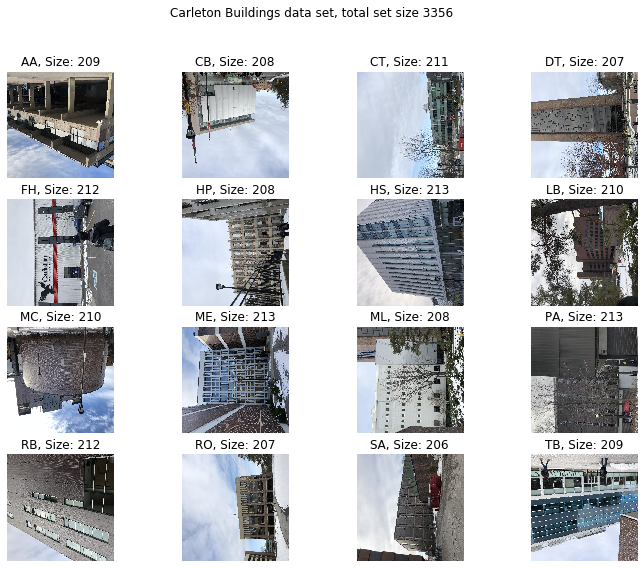

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

labels = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

data = []
for code in labels:
  data.append(sorted(glob('All_Images_500x500/' + code + '/*.jpg')))

totalSize = sum(len(buildings) for buildings in data)
N, R, C = 16, 4, 4
fig = plt.figure(figsize=(12, 9))

fig.suptitle("{}, total set size {}".format("Carleton Buildings data set", totalSize))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src[0]).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title('{}, Size: {}'.format(label, len(src)))
    plt.imshow(np.asarray(im))
    plt.axis('off')

plt.show()

##Step 3: Split the model to validation and training data

In [0]:
from sklearn.model_selection import train_test_split
from shutil import copyfile
import os

test_size = 0.20
TRAIN_DIR = 'train' 
TEST_DIR = 'test'

dataSet={TRAIN_DIR: {}, TEST_DIR: {}}
for k, (src, label) in enumerate(zip(data, labels)):
  #labelSet = [label for x in range(src)]
  labelSet = np.full((len(src), 1), label)
  X_train, X_test, y_train, y_test = train_test_split(
      src,
      labelSet,
      stratify = labelSet,
      test_size = test_size)
  dataSet[TRAIN_DIR][label] = X_train
  dataSet[TEST_DIR][label] = X_test

testSetSize=0
trainSetSize=0

print('Train set size')
for key, value in dataSet[TRAIN_DIR].items():
  for i, src in enumerate(value):
    path = '{}/{}/'.format(TRAIN_DIR, key)
    if not os.path.exists(path):
      os.makedirs(path)
    copyfile(src, '{}{}.jpg'.format(path, i))
  print('{}: {}'.format(key, len(value)));
  trainSetSize+=len(value)

print('\nTest set size')
for key, value in dataSet[TEST_DIR].items():
  for i, src in enumerate(value):
    path = '{}/{}/'.format(TEST_DIR, key)
    if not os.path.exists(path):
      os.makedirs(path)
    copyfile(src, '{}{}.jpg'.format(path, i))
  print('{}: {}'.format(key, len(value)));
  testSetSize+=len(value)

print('\nTotal train set size {}'.format(trainSetSize))
print('Total test set size {}'.format(testSetSize))



Train set size
AA: 167
CB: 166
CT: 168
DT: 165
FH: 169
HP: 166
HS: 170
LB: 168
MC: 168
ME: 170
ML: 166
PA: 170
RB: 169
RO: 165
SA: 164
TB: 167

Test set size
AA: 42
CB: 42
CT: 43
DT: 42
FH: 43
HP: 42
HS: 43
LB: 42
MC: 42
ME: 43
ML: 42
PA: 43
RB: 43
RO: 42
SA: 42
TB: 42

Total train set size 2678
Total test set size 678


##Step 4: Save the inital VGG16 model to file

In [0]:
# Whatever code is required to save your trained model to a file. 
# Should be re-loaded by prepareModel() during testing.
# load model

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.vgg16 import VGG16

CLASSES = len(labels)
    
# Load base VGG16 model
base_model = VGG16(include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
   
# freeze the base layrs for transfer learning
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#summary
model.summary()


Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
________________________________________________________________

##Step 5: Setup Augmentated Data Generators

Found 2678 images belonging to 16 classes.
Found 678 images belonging to 16 classes.


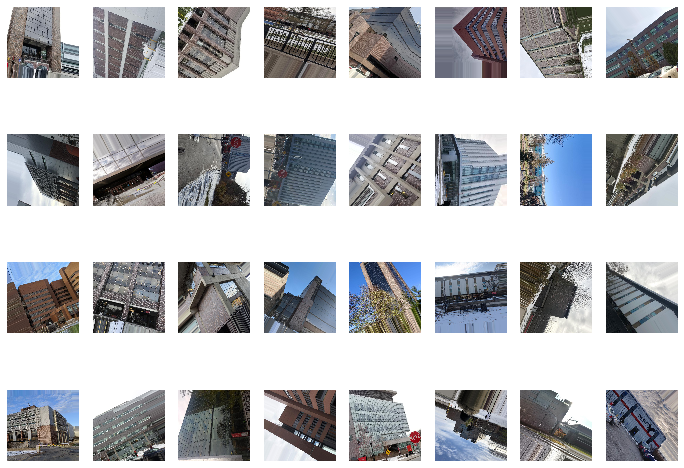

In [0]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 500
HEIGHT = 500
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    classes=labels,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    classes=labels,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# take a look at what they look like
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

##Step 6: Train The Model With The Generators

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import json

EPOCHS = 4096
BATCH_SIZE = 8
VALIDATION_STEPS = 16
STEPS_PER_EPOCH = 32
PATIENCE = 32

"""
keeping google colab open with this to train for a long time
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}setInterval(ClickConnect,60000)
"""

MODEL_FILE = 'cu_building_classifier.model'

#retrainine the same model again if desired 
#model = load_model(MODEL_FILE)

#load previous weights if desired
#model.load_weights('weights-improvement-02-0.81.hdf5')
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

#save model weights on each improvement
mc = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#stop modle after no improvement over sevral epochs
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=PATIENCE)

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[mc, es])
  
# save model and training history
model.save(MODEL_FILE)
with open('history.json', 'w') as file:
    json.dump(history.history, file)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/4096
32/32 [==============================] - 136s 4s/step - loss: 2.9313 - acc: 0.0725 - val_loss: 2.7314 - val_acc: 0.1289

Epoch 00001: val_acc improved from -inf to 0.12891, saving model to weights-improvement-01-0.13.hdf5
Epoch 2/4096
32/32 [==============================] - 117s 4s/step - loss: 2.8002 - acc: 0.0928 - val_loss: 2.6943 - val_acc: 0.1523

Epoch 00002: val_acc improved from 0.12891 to 0.15226, saving model to weights-improvement-02-0.15.hdf5
Epoch 3/4096
32/32 [==============================] - 105s 3s/step - loss: 2.7709 - acc: 0.1055 - val_loss: 2.6360 - val_acc: 0.2798

Epoch 00003: val_acc improved from 0.15226 to 0.27984, saving model to weights-improvement-03-0.28.hdf5
Epoch 4/4096
32/32 [==============================] - 97s 3s/step - loss: 2.6715 - acc: 0.1689 - val_loss: 2.5959 - val_acc: 0.2988

Epoch 00004: val_acc improved from 0.27984 to 0.29883, savin

##Step 7: Plotting Learning Curve to See Results of Learning

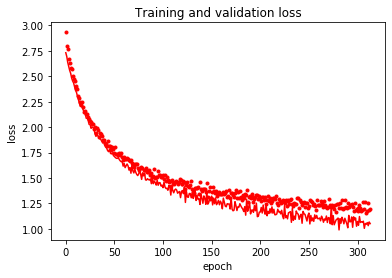

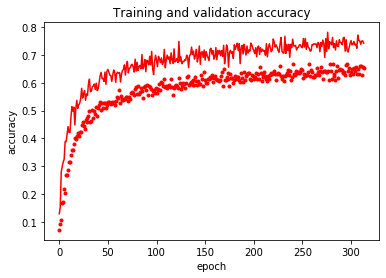

In [0]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
   

#The history look quite bad here due to the fact I had to cancle the early 
#training of the model and lost the early history.
plot_training(history)

##Step 8: Classify Validation Set for Caculating Confusion Matrix

In [0]:
# Load model from github
!wget https://github.com/TheColourRed/carleton-u-name-that-building/raw/master/cu_building_classifier.model

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')
MODEL_FILE = 'cu_building_classifier.model'

--2019-12-08 06:27:06--  https://github.com/TheColourRed/carleton-u-name-that-building/raw/master/cu_building_classifier.model
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TheColourRed/carleton-u-name-that-building/master/cu_building_classifier.model [following]
--2019-12-08 06:27:06--  https://raw.githubusercontent.com/TheColourRed/carleton-u-name-that-building/master/cu_building_classifier.model
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58996168 (56M) [application/octet-stream]
Saving to: ‘cu_building_classifier.model.1’

cu_building_classif 100%[===================>]  56.26M   181MB/s    

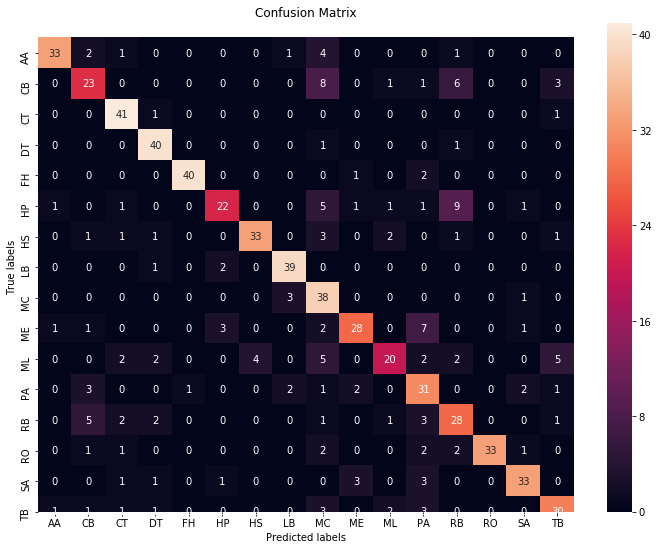

In [0]:
from keras.preprocessing import image as kp_image
from keras.applications.inception_v3 import decode_predictions, preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def classifyImage(fname):
  WIDTH = 500
  HEIGHT = 500
  labels = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

  img = kp_image.load_img(fname, target_size=(HEIGHT, WIDTH))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
  preds = model.predict(x)        # Use the model to compute prediction score for each possible class
  label = labels[preds.argmax(axis=-1)[0]] # Decodes the predicted class scores to assign a single class label
  return label

x_test=[]
y_true=[]
y_pred=[]
for key, value in dataSet[TEST_DIR].items():
  for src in value:
    img = kp_image.load_img(src, target_size=(HEIGHT, WIDTH))
    x = kp_image.img_to_array(img)  # Convert image to nparray
    x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
    x = preprocess_input(x)  
    x_test.append(x)
    y_true.append(key)
    y_pred.append(classifyImage(src))  

# Function to pretty-print confusion matrix. Doesn't work perfectly...
def printCM(cm,labels):
  plt.figure(figsize=(12, 9))
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix') 
  ax.set_ylim(len(cm)-0.5, -0.5)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  return

cm = confusion_matrix(y_true, y_pred)

printCM(cm, labels)

##Step 9: Calculate Modle Metrics (Recall, Precision, & Accuracy)

In [0]:
from keras import backend as K

tp_fp = np.sum(cm, axis=0) #TP + FP
tp_fn = np.sum(cm, axis=1) #TP + FN

precisions=[]
recalls=[]
for i in range(len(cm)):
  tp=cm[i][i]
  precisions.append(tp/tp_fp[i])
  recalls.append(tp/tp_fn[i])


print('Recalls:')
for i, val in enumerate(recalls):
  print('{}: {}'.format(labels[i], val))

print('\nPrecisions:')
for i, val in enumerate(precisions):
  print('{}: {}'.format(labels[i], val))

print('\nbuilding with worst recall is {} at index {}'.format(labels[np.argmin(recalls)], np.argmin(recalls)))
print('\nbuilding with best precision is {} at index {}'.format(labels[np.argmax(precisions)], np.argmax(precisions)))
print('\nAccuracy score: {}'.format(accuracy_score(y_true, y_pred)))

Recalls:
AA: 0.7857142857142857
CB: 0.5476190476190477
CT: 0.9534883720930233
DT: 0.9523809523809523
FH: 0.9302325581395349
HP: 0.5238095238095238
HS: 0.7674418604651163
LB: 0.9285714285714286
MC: 0.9047619047619048
ME: 0.6511627906976745
ML: 0.47619047619047616
PA: 0.7209302325581395
RB: 0.6511627906976745
RO: 0.7857142857142857
SA: 0.7857142857142857
TB: 0.7142857142857143

Precisions:
AA: 0.9166666666666666
CB: 0.6216216216216216
CT: 0.803921568627451
DT: 0.8163265306122449
FH: 0.975609756097561
HP: 0.7857142857142857
HS: 0.8918918918918919
LB: 0.8666666666666667
MC: 0.5205479452054794
ME: 0.8
ML: 0.7407407407407407
PA: 0.5636363636363636
RB: 0.56
RO: 1.0
SA: 0.8461538461538461
TB: 0.7142857142857143

building with worst recall is ML at index 10

building with best precision is RO at index 13

Accuracy score: 0.7551622418879056
